# 学习读取`WRF`中`namelist.wps`网格设置参数并绘图
---

*@author: Evan*\
*@date: 2023-03-14*

In [1]:
import xarray as xr
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import WRFDomainLib

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
shp_nanhai=Reader('F:/shapefile/南海诸岛/bou2_4l.shp') # 完整的国界省界九段线

shp_CN=Reader('F:/shapefile/4.中国省市县区划(2023)/国界/国家矢量.shp')
shp_JDX=Reader('F:/shapefile/4.中国省市县区划(2023)/九段线/九段线.shp')
shp_Sheng=Reader('F:/shapefile/4.中国省市县区划(2023)/2023年省级/2023年初省级矢量.shp') #耗时较长
shp_Shi=Reader('F:/shapefile/4.中国省市县区划(2023)/2023年地级/2023年初地级矢量.shp')
shp_Xian=Reader('F:/shapefile/4.中国省市县区划(2023)/2023年县级/2023年初县矢量.shp')

shp_Sheng_new=Reader('F:/shapefile/区县级行政区划数据-审图号：GS（2022）1873号/调整/省.shp')
shp_Shi_new=Reader('F:/shapefile/区县级行政区划数据-审图号：GS（2022）1873号/调整/市.shp')

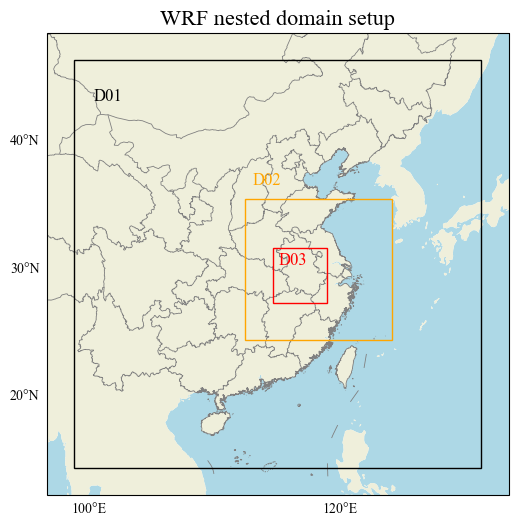

In [3]:
WPSFile = './namelist_revised.wps'
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)

fig = plt.figure(figsize=(9,6))
ax = plt.subplot(1, 1, 1, projection=wpsproj)

color_d01='k'
color_d02='orange'
color_d03='r'
textsize=12

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax.add_patch(mpl.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], fill=None, lw=1, edgecolor=color_d01, zorder=2))
ax.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.9, 'D01',size=textsize, color=color_d01, zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*1.1, 'D02',size=textsize, color=color_d02, zorder=2)

# d03 box
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

# decorations
# ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax.add_feature(cartopy.feature.LAND, edgecolor='None', zorder=1)
ax.add_feature(cfeat.ShapelyFeature(shp_nanhai.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl.top_labels = False
gl.right_labels = False
gl.rotate_labels=False
gl.xlocator = mpl.ticker.FixedLocator(np.arange(80,161,20))
gl.ylocator = mpl.ticker.FixedLocator(np.arange(-10,61,10))

ax.set_title('WRF nested domain setup', size=16)

plt.show()

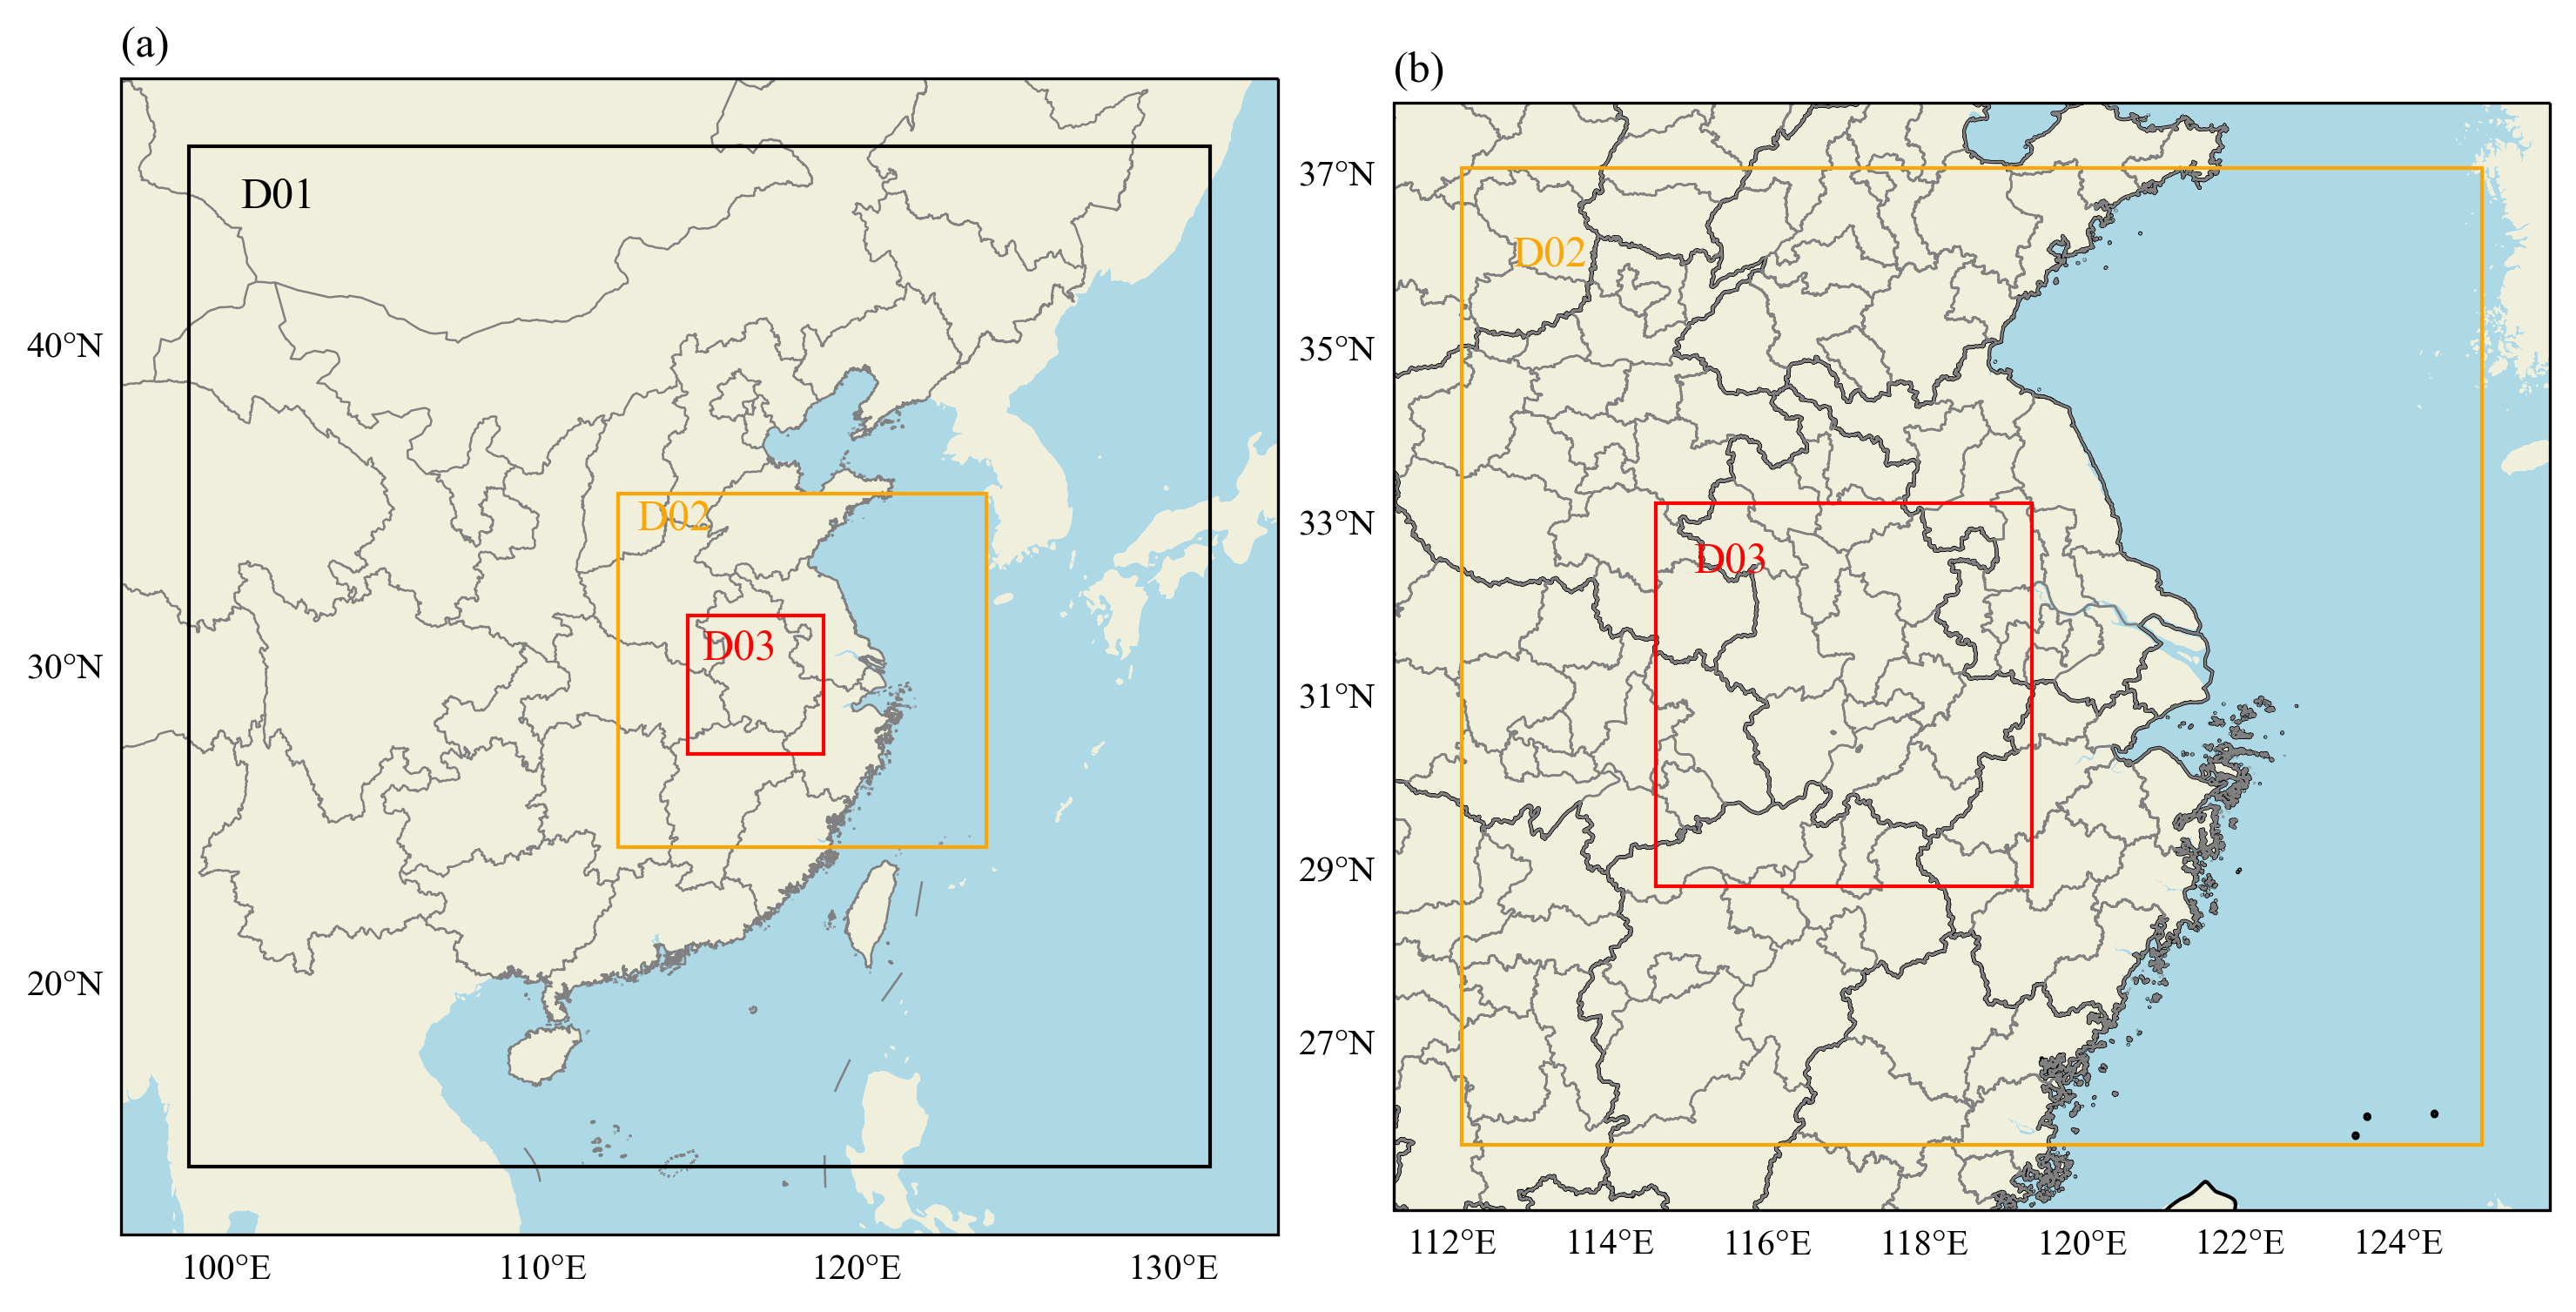

In [14]:
WPSFile = './namelist_revised.wps'
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)

fig = plt.figure(figsize=(12,6),dpi=300)
ax1 = plt.subplot(1, 2, 1, projection=wpsproj)
ax2 = plt.subplot(1, 2, 2, projection=wpsproj)

color_d01='k'
color_d02='orange'
color_d03='r'
textsize=12

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(mpl.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], fill=None, lw=1, edgecolor=color_d01, zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.94, 'D01',size=textsize, color=color_d01, zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*0.9, 'D02',size=textsize, color=color_d02, zorder=2)

ax2.set_xlim([corner_x2[0]-length_x[1]/15, corner_x2[3]+length_x[1]/15])
ax2.set_ylim([corner_y2[0]-length_y[1]/15, corner_y2[3]+length_y[1]/15])

ax2.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax2.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*0.9, 'D02',size=textsize, color=color_d02, zorder=2)

# d03 box
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax1.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

ax2.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax2.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

# ======================================decorations======================================

ax1.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax1.add_feature(cartopy.feature.LAND, edgecolor='None', zorder=1)
ax1.add_feature(cfeat.ShapelyFeature(shp_nanhai.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)

ax2.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax2.add_feature(cartopy.feature.LAND, edgecolor='None', zorder=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Sheng_new.geometries(),ccrs.PlateCarree(),edgecolor='k',facecolor='None'), linewidth=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Shi_new.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)
# ax2.set_extent([112, 124, 27.6, 33.6])

gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl1.top_labels = False
gl1.right_labels = False
gl1.rotate_labels=False
gl1.xlocator = mpl.ticker.FixedLocator(np.arange(80,161,10))
gl1.ylocator = mpl.ticker.FixedLocator(np.arange(-10,61,10))

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl2.top_labels = False
gl2.right_labels = False
gl2.rotate_labels=False
gl2.xlocator = mpl.ticker.FixedLocator(np.arange(110,130,2))
gl2.ylocator = mpl.ticker.FixedLocator(np.arange(21,40,2))

ax1.set_title('(a)',loc='left')
ax2.set_title('(b)',loc='left')

plt.subplots_adjust(wspace=0.1)
plt.show()

In [15]:
DEMFile = 'F:/Data/Height_World/ETOPO2v2c_f4.nc'
DEMDs = xr.open_dataset(DEMFile)
dem = DEMDs['z'].values
dem_lat = DEMDs['y'].values
dem_lon = DEMDs['x'].values

dem_lons, dem_lats = np.meshgrid(dem_lon, dem_lat)

# for i in np.arange(dem.shape[0]):
#     for j in np.arange(dem.shape[1]):
#         if dem[i,j]<0:
#             dem[i,j]=0
            
cmap = mpl.cm.terrain
vmin = -5000
vmax = 5000

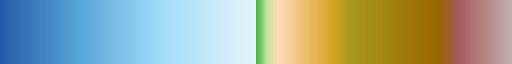

In [16]:
import cmaps
from matplotlib.colors import ListedColormap

cmap1=cmaps.WhiteBlue_r
cmap2=cmaps.WhiteGreen_r
cmap3=cmaps.GMT_globe

list1=cmap1(np.linspace(0.2,0.85,1000))
list2=cmap2(np.linspace(0.5,0.8,40))
list3=cmap3(np.linspace(0.51,0.85,960))
ncolor=np.vstack((list1,list2,list3))
newmap=ListedColormap(ncolor)

newmap

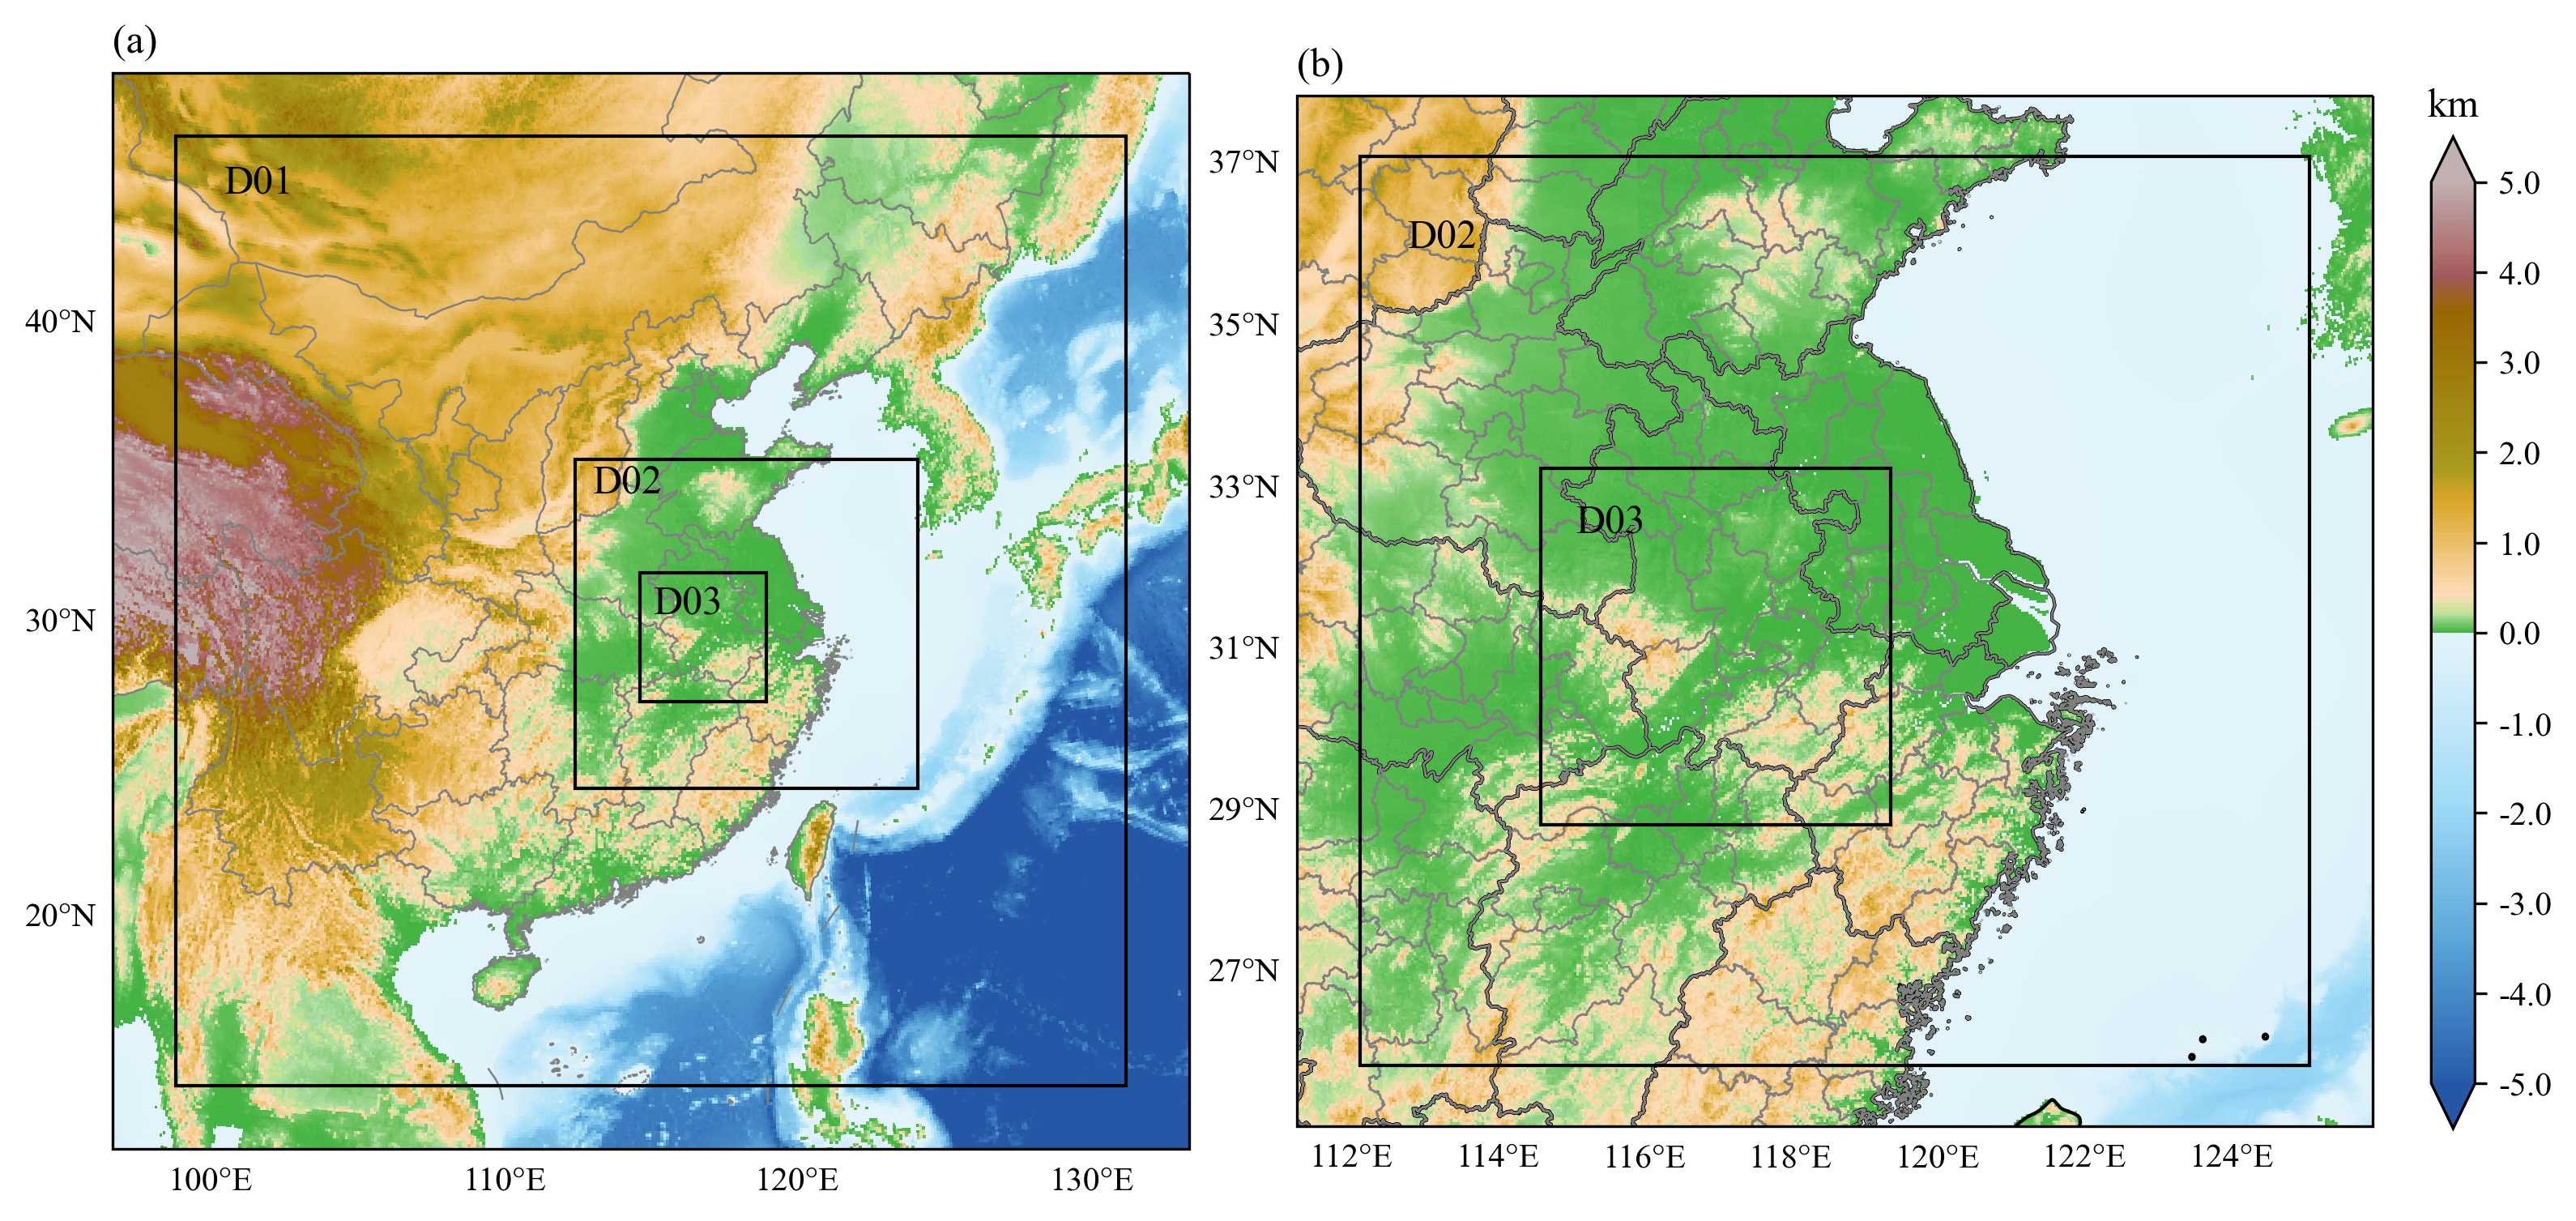

In [18]:
WPSFile = './namelist_revised.wps'
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)

fig = plt.figure(figsize=(12,6),dpi=300)
ax1 = plt.subplot(1, 2, 1, projection=wpsproj)
ax2 = plt.subplot(1, 2, 2, projection=wpsproj)

color_d01='k'
color_d02='k'
color_d03='k'
textsize=12

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(mpl.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], fill=None, lw=1, edgecolor=color_d01, zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.94, 'D01',size=textsize, color=color_d01, zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*0.9, 'D02',size=textsize, color=color_d02, zorder=2)

ax2.set_xlim([corner_x2[0]-length_x[1]/15, corner_x2[3]+length_x[1]/15])
ax2.set_ylim([corner_y2[0]-length_y[1]/15, corner_y2[3]+length_y[1]/15])

ax2.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax2.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*0.9, 'D02',size=textsize, color=color_d02, zorder=2)

# d03 box
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax1.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

ax2.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax2.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

# ======================================decorations======================================

# ax1.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax1.add_feature(cfeat.ShapelyFeature(shp_nanhai.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)

# ax2.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Sheng_new.geometries(),ccrs.PlateCarree(),edgecolor='k',facecolor='None'), linewidth=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Shi_new.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)
# ax2.set_extent([112, 124, 27.6, 33.6])

gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl1.top_labels = False
gl1.right_labels = False
gl1.rotate_labels=False
gl1.xlocator = mpl.ticker.FixedLocator(np.arange(80,161,10))
gl1.ylocator = mpl.ticker.FixedLocator(np.arange(-10,61,10))

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl2.top_labels = False
gl2.right_labels = False
gl2.rotate_labels=False
gl2.xlocator = mpl.ticker.FixedLocator(np.arange(110,130,2))
gl2.ylocator = mpl.ticker.FixedLocator(np.arange(23,40,2))

# ======================================decorations======================================
cp=ax1.pcolormesh(dem_lons[::3,::3], dem_lats[::3,::3], dem[::3,::3], cmap=newmap, vmin=vmin, vmax=vmax, alpha=1, transform=ccrs.PlateCarree(), zorder=0)
cp=ax2.pcolormesh(dem_lons, dem_lats, dem, cmap=newmap, vmin=vmin, vmax=vmax, alpha=1, transform=ccrs.PlateCarree(), zorder=0)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.12)
position= fig.add_axes([0.92,0.14,0.015,0.68])
cbar=fig.colorbar(cp,cax=position,extend='both')
cbar.set_ticks(np.arange(-5000,5001,1000))
cbar.set_ticklabels(np.arange(-5,5.1,1))
cbar.ax.set_title('km')

ax1.set_title('(a)',loc='left')
ax2.set_title('(b)',loc='left')

plt.subplots_adjust(wspace=0.1)
plt.show()

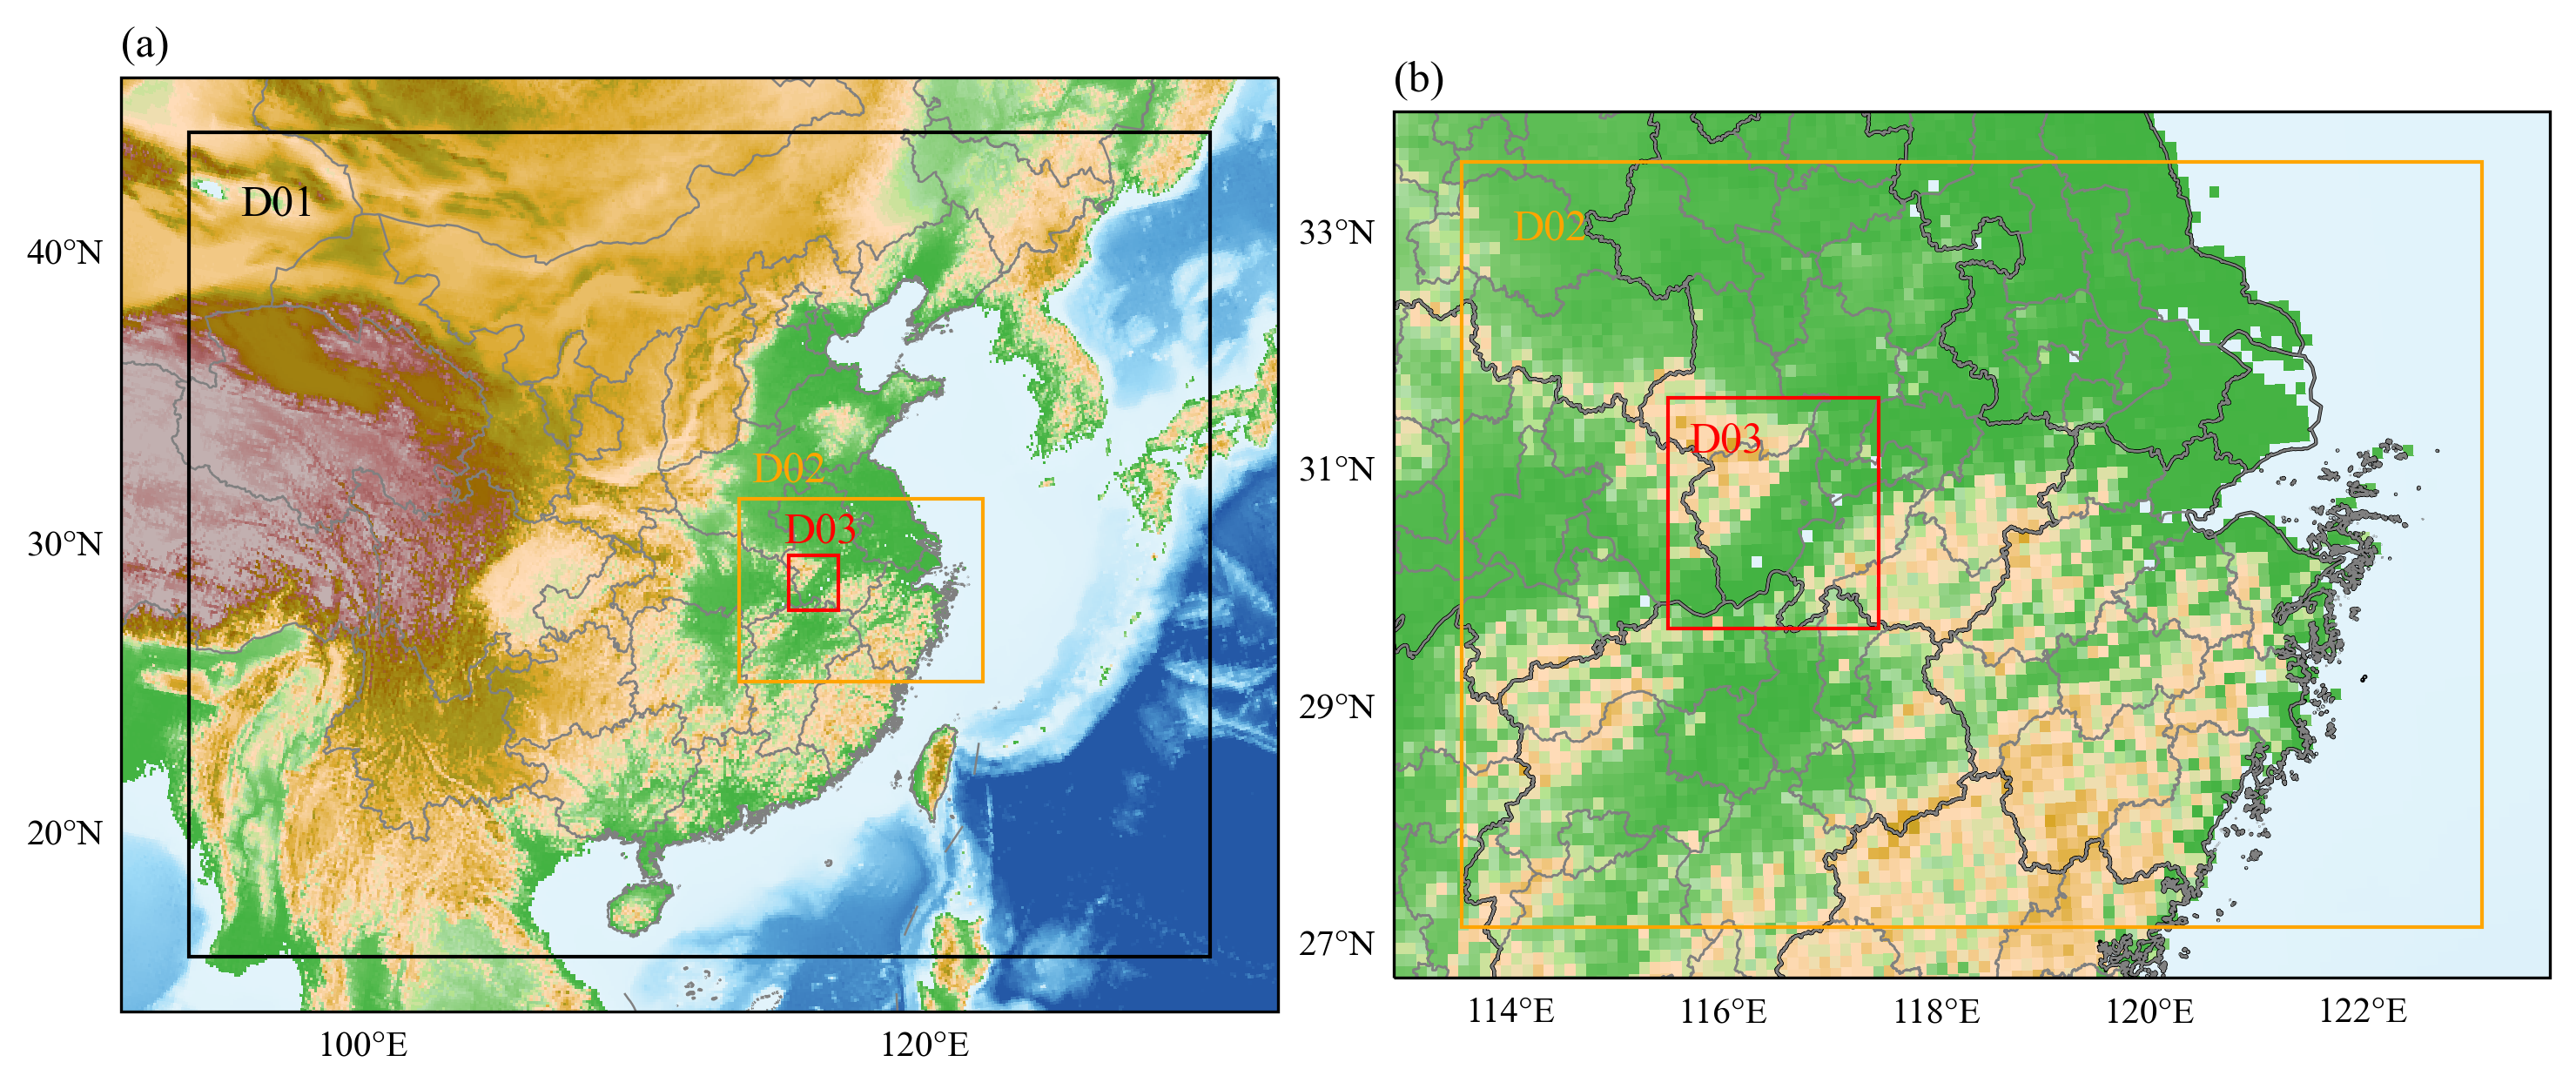

In [7]:
WPSFile = './namelist.wps'
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)

fig = plt.figure(figsize=(12,6),dpi=300)
ax1 = plt.subplot(1, 2, 1, projection=wpsproj)
ax2 = plt.subplot(1, 2, 2, projection=wpsproj)

color_d01='k'
color_d02='orange'
color_d03='r'
textsize=12

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(mpl.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], fill=None, lw=1, edgecolor=color_d01, zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.9, 'D01',size=textsize, color=color_d01, zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*1.1, 'D02',size=textsize, color=color_d02, zorder=2)

ax2.set_xlim([corner_x2[0]-length_x[1]/15, corner_x2[3]+length_x[1]/15])
ax2.set_ylim([corner_y2[0]-length_y[1]/15, corner_y2[3]+length_y[1]/15])

ax2.add_patch(mpl.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], fill=None, lw=1, edgecolor=color_d02, zorder=2))
ax2.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*0.9, 'D02',size=textsize, color=color_d02, zorder=2)

# d03 box
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax1.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax1.text(corner_x3[0]-length_x[2]*0.1, corner_y3[0]+length_y[2]*1.8, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

ax2.add_patch(mpl.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],fill=None, lw=1, edgecolor=color_d03, zorder=2))
ax2.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',size=textsize, color=color_d03, zorder=2)

# ======================================decorations======================================

# ax1.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax1.add_feature(cfeat.ShapelyFeature(shp_nanhai.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)

# ax2.add_feature(cartopy.feature.OCEAN, edgecolor='None', facecolor='lightblue', zorder=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Sheng_new.geometries(),ccrs.PlateCarree(),edgecolor='k',facecolor='None'), linewidth=1)
ax2.add_feature(cfeat.ShapelyFeature(shp_Shi_new.geometries(),ccrs.PlateCarree(),edgecolor='gray',facecolor='None'), linewidth=0.6)
# ax2.set_extent([112, 124, 27.6, 33.6])

gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl1.top_labels = False
gl1.right_labels = False
gl1.rotate_labels=False
gl1.xlocator = mpl.ticker.FixedLocator(np.arange(80,161,20))
gl1.ylocator = mpl.ticker.FixedLocator(np.arange(-10,61,10))

gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--',lw=0,x_inline=False, y_inline=False,)
gl2.top_labels = False
gl2.right_labels = False
gl2.rotate_labels=False
gl2.xlocator = mpl.ticker.FixedLocator(np.arange(110,130,2))
gl2.ylocator = mpl.ticker.FixedLocator(np.arange(25,35,2))

# ======================================decorations======================================
cf=ax1.contourf(dem_lons[::3,::3], dem_lats[::3,::3], dem[::3,::3],levels=np.arange(-5000,5001,100),
                  cmap=newmap,transform=ccrs.PlateCarree(),extend='both')

# cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.01])
# fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)),
#               cax=cbar_ax, ticks=np.arange(0, vmax+1, 1000), orientation='horizontal')
# cbar_ax.tick_params(labelsize=12)
# cbar_ax.text((vmin+vmax)/2, 5000, 'elevation (m)', ha='center', va='bottom', size=12)

ax1.set_title('(a)',loc='left')
ax2.set_title('(b)',loc='left')

plt.subplots_adjust(wspace=0.1)
plt.show()